In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel('Data_Train.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_excel('Test_set.xlsx')

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train.drop_duplicates(inplace=True)

In [7]:
test.drop_duplicates(inplace=True)

In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=train.drop('Price',axis=1)
y=train.Price

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.3,random_state=101)
X_test=test.copy()

In [12]:
def shape():
    return X_train.shape,X_valid.shape,X_test.shape
    

In [13]:
shape()

((7324, 10), (3139, 10), (2645, 10))

In [14]:
X_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [15]:
X_train.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,7324,7324,7324,7324,7324,7324,7324,7324,7324,7324
unique,11,44,5,6,119,217,1137,359,5,9
top,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,17:00,19:00,2h 50m,1 stop,No info
freq,2576,342,3028,3028,1669,155,280,378,3917,5718


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 7041 to 1551
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7324 non-null   object
 1   Date_of_Journey  7324 non-null   object
 2   Source           7324 non-null   object
 3   Destination      7324 non-null   object
 4   Route            7324 non-null   object
 5   Dep_Time         7324 non-null   object
 6   Arrival_Time     7324 non-null   object
 7   Duration         7324 non-null   object
 8   Total_Stops      7324 non-null   object
 9   Additional_Info  7324 non-null   object
dtypes: object(10)
memory usage: 629.4+ KB


#Feature Engineering

In [17]:
cols=X_train.select_dtypes(exclude=['int64','float64']).columns.to_list()

In [18]:
X_train['Date']=X_train['Date_of_Journey'].str.split('/').str[0]
X_train['Month']=X_train['Date_of_Journey'].str.split('/').str[1]
X_train['Year']=X_train['Date_of_Journey'].str.split('/').str[2]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [19]:
X_test['Date']=X_test['Date_of_Journey'].str.split('/').str[0]
X_test['Month']=X_test['Date_of_Journey'].str.split('/').str[1]
X_test['Year']=X_test['Date_of_Journey'].str.split('/').str[2]

In [20]:
X_valid['Date']=X_valid['Date_of_Journey'].str.split('/').str[0]
X_valid['Month']=X_valid['Date_of_Journey'].str.split('/').str[1]
X_valid['Year']=X_valid['Date_of_Journey'].str.split('/').str[2]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [21]:
X_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
7041,IndiGo,1/05/2019,Banglore,Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,1,05,2019
8223,SpiceJet,12/05/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 13 May,1h 30m,non-stop,No check-in baggage included,12,05,2019
884,Multiple carriers,9/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:00,11h 30m,1 stop,No info,9,05,2019
4733,Air India,6/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 07 Jun,26h 35m,2 stops,No info,6,06,2019
5673,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,18:50,12h 50m,1 stop,No info,21,03,2019


In [22]:
X_train.drop('Date_of_Journey',axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
X_test.drop('Date_of_Journey',axis=1,inplace=True)

In [24]:
X_valid.drop('Date_of_Journey',axis=1,inplace=True)

In [25]:
shape()

((7324, 12), (3139, 12), (2645, 12))

In [26]:
X_train['Date']=X_train['Date'].astype(int)
X_train['Month']=X_train['Month'].astype(int)
X_train['Year']=X_train['Year'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [27]:
X_test['Date']=X_test['Date'].astype(int)
X_test['Month']=X_test['Month'].astype(int)
X_test['Year']=X_test['Year'].astype(int)

In [28]:
X_valid['Date']=X_valid['Date'].astype(int)
X_valid['Month']=X_valid['Month'].astype(int)
X_valid['Year']=X_valid['Year'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 7041 to 1551
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7324 non-null   object
 1   Source           7324 non-null   object
 2   Destination      7324 non-null   object
 3   Route            7324 non-null   object
 4   Dep_Time         7324 non-null   object
 5   Arrival_Time     7324 non-null   object
 6   Duration         7324 non-null   object
 7   Total_Stops      7324 non-null   object
 8   Additional_Info  7324 non-null   object
 9   Date             7324 non-null   int32 
 10  Month            7324 non-null   int32 
 11  Year             7324 non-null   int32 
dtypes: int32(3), object(9)
memory usage: 658.0+ KB


In [30]:
X_train['Arrival_Time']=X_train['Arrival_Time'].str.split(' ').str[0]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
X_test['Arrival_Time']=X_test['Arrival_Time'].str.split(' ').str[0]

In [32]:
X_valid['Arrival_Time']=X_valid['Arrival_Time'].str.split(' ').str[0]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
shape()

((7324, 12), (3139, 12), (2645, 12))

In [34]:
X_train['Total_Stops'].value_counts()

1 stop      3917
non-stop    2459
2 stops      916
3 stops       31
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
X_train['Total_Stops']=X_train['Total_Stops'].replace('non-stop','0 stop')

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
X_test['Total_Stops']=X_test['Total_Stops'].replace('non-stop','0 stop')

In [37]:
X_valid['Total_Stops']=X_valid['Total_Stops'].replace('non-stop','0 stop')

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
X_train['Stop'] = X_train['Total_Stops'].str.split(' ').str[0]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
X_test['Stop'] = X_test['Total_Stops'].str.split(' ').str[0]

In [40]:
X_valid['Stop'] = X_valid['Total_Stops'].str.split(' ').str[0]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
def check_null():
    return pd.concat([pd.DataFrame(X_train.isnull().sum(),columns=['train']),pd.DataFrame(X_valid.isnull().sum(),columns=['valid']),pd.DataFrame(X_test.isnull().sum(),columns=['test'])],axis=1)

In [42]:
check_null()

,train,valid,test
Airline,0,0,0
Source,0,0,0
Destination,0,0,0
Route,0,1,0
Dep_Time,0,0,0
Arrival_Time,0,0,0
Duration,0,0,0
Total_Stops,0,1,0
Additional_Info,0,0,0
Date,0,0,0


In [43]:
X_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Stop
7041,IndiGo,Banglore,Delhi,BLR → DEL,18:25,21:20,2h 55m,0 stop,No info,1,5,2019,0
8223,SpiceJet,Mumbai,Hyderabad,BOM → HYD,22:45,00:15,1h 30m,0 stop,No check-in baggage included,12,5,2019,0
884,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,07:30,19:00,11h 30m,1 stop,No info,9,5,2019,1
4733,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15,26h 35m,2 stops,No info,6,6,2019,2
5673,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,06:00,18:50,12h 50m,1 stop,No info,21,3,2019,1


In [44]:
X_valid.Stop.isnull().sum()

1

In [45]:
X_valid[X_valid.Stop.isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Stop
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,6,5,2019,NaN


In [46]:
X_valid.Stop.value_counts()

1    1708
0    1016
2     402
3      12
Name: Stop, dtype: int64

In [47]:
X_valid.Stop.fillna('1',inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [48]:
X_train['Stop']=X_train['Stop'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
X_test['Stop']=X_test['Stop'].astype(int)

In [50]:
X_valid['Stop']=X_valid['Stop'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
#import statistics as st

In [52]:
#X_valid.Stop=X_valid.Stop.fillna(st.mode(X_valid.Stop))

In [53]:
#X_test.Stop=X_test.Stop.fillna(st.mode(X_test.Stop))

In [54]:
#X_valid['Stop']=X_valid['Total_Stops'].fillna('1 stop',inplace=True)

In [55]:
X_train.drop('Total_Stops',axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
X_test.drop('Total_Stops',axis=1,inplace=True)

In [57]:
X_valid.drop('Total_Stops',axis=1,inplace=True)

In [58]:
shape()

((7324, 12), (3139, 12), (2645, 12))

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 7041 to 1551
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7324 non-null   object
 1   Source           7324 non-null   object
 2   Destination      7324 non-null   object
 3   Route            7324 non-null   object
 4   Dep_Time         7324 non-null   object
 5   Arrival_Time     7324 non-null   object
 6   Duration         7324 non-null   object
 7   Additional_Info  7324 non-null   object
 8   Date             7324 non-null   int32 
 9   Month            7324 non-null   int32 
 10  Year             7324 non-null   int32 
 11  Stop             7324 non-null   int32 
dtypes: int32(4), object(8)
memory usage: 629.4+ KB


In [60]:
X_train['Arrival_Hour'] = X_train['Arrival_Time'] .str.split(':').str[0]
X_train['Arrival_Minute'] = X_train['Arrival_Time'] .str.split(':').str[1]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
X_test['Arrival_Hour'] = X_test['Arrival_Time'] .str.split(':').str[0]
X_test['Arrival_Minute'] = X_test['Arrival_Time'] .str.split(':').str[1]

In [62]:
X_valid['Arrival_Hour'] = X_valid['Arrival_Time'] .str.split(':').str[0]
X_valid['Arrival_Minute'] = X_valid['Arrival_Time'] .str.split(':').str[1]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
X_train['Arrival_Hour']=X_train['Arrival_Hour'].astype(int)
X_test['Arrival_Hour']=X_test['Arrival_Hour'].astype(int)
X_valid['Arrival_Hour']=X_valid['Arrival_Hour'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
X_train['Arrival_Minute']=X_train['Arrival_Minute'].astype(int)
X_test['Arrival_Minute']=X_test['Arrival_Minute'].astype(int)
X_valid['Arrival_Minute']=X_valid['Arrival_Minute'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
X_train.drop('Arrival_Time',axis=1,inplace=True)

In [66]:
X_test.drop('Arrival_Time',axis=1,inplace=True)

In [67]:
X_valid.drop('Arrival_Time',axis=1,inplace=True)

In [68]:
shape()

((7324, 13), (3139, 13), (2645, 13))

In [69]:
X_train['Departure_Hour'] = X_train['Dep_Time'] .str.split(':').str[0]
X_train['Departure_Minute'] =X_train['Dep_Time'] .str.split(':').str[1]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
X_test['Departure_Hour'] = X_test['Dep_Time'] .str.split(':').str[0]
X_test['Departure_Minute'] =X_test['Dep_Time'] .str.split(':').str[1]

In [71]:
X_valid['Departure_Hour'] = X_valid['Dep_Time'] .str.split(':').str[0]
X_valid['Departure_Minute'] =X_valid['Dep_Time'] .str.split(':').str[1]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
X_train['Departure_Hour']=X_train['Departure_Hour'].astype(int)
X_train['Departure_Minute']=X_train['Departure_Minute'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
X_test['Departure_Hour']=X_test['Departure_Hour'].astype(int)
X_test['Departure_Minute']=X_test['Departure_Minute'].astype(int)

In [74]:
X_valid['Departure_Hour']=X_valid['Departure_Hour'].astype(int)
X_valid['Departure_Minute']=X_valid['Departure_Minute'].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
X_train.drop('Dep_Time',axis=1,inplace=True)

In [76]:
X_test.drop('Dep_Time',axis=1,inplace=True)

In [77]:
X_valid.drop('Dep_Time',axis=1,inplace=True)

In [78]:
shape()

((7324, 14), (3139, 14), (2645, 14))

In [79]:
check_null()

,train,valid,test
Airline,0,0,0
Source,0,0,0
Destination,0,0,0
Route,0,1,0
Duration,0,0,0
Additional_Info,0,0,0
Date,0,0,0
Month,0,0,0
Year,0,0,0
Stop,0,0,0


In [80]:
X_train.Route.value_counts()

DEL → BOM → COK          1669
BLR → DEL                1080
CCU → BOM → BLR           673
CCU → BLR                 521
BOM → HYD                 434
                         ... 
BOM → GOI → HYD             1
BLR → TRV → COK → DEL       1
BOM → VNS → DEL → HYD       1
BOM → JLR → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 119, dtype: int64

In [81]:
X_train['Route_1']=X_train['Route'].str.split('→ ').str[0]
X_train['Route_2']=X_train['Route'].str.split('→ ').str[1]
X_train['Route_3']=X_train['Route'].str.split('→ ').str[2]
X_train['Route_4']=X_train['Route'].str.split('→ ').str[3]
X_train['Route_5']=X_train['Route'].str.split('→ ').str[5]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [82]:
X_test['Route_1']=X_test['Route'].str.split('→ ').str[0]
X_test['Route_2']=X_test['Route'].str.split('→ ').str[1]
X_test['Route_3']=X_test['Route'].str.split('→ ').str[2]
X_test['Route_4']=X_test['Route'].str.split('→ ').str[3]
X_test['Route_5']=X_test['Route'].str.split('→ ').str[5]

In [83]:
X_valid['Route_1']=X_valid['Route'].str.split('→ ').str[0]
X_valid['Route_2']=X_valid['Route'].str.split('→ ').str[1]
X_valid['Route_3']=X_valid['Route'].str.split('→ ').str[2]
X_valid['Route_4']=X_valid['Route'].str.split('→ ').str[3]
X_valid['Route_5']=X_valid['Route'].str.split('→ ').str[5]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [84]:
X_train.drop('Route',axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
X_test.drop('Route',axis=1,inplace=True)

In [86]:
X_valid.drop('Route',axis=1,inplace=True)

In [87]:
check_null()

,train,valid,test
Airline,0,0,0
Source,0,0,0
Destination,0,0,0
Duration,0,0,0
Additional_Info,0,0,0
Date,0,0,0
Month,0,0,0
Year,0,0,0
Stop,0,0,0
Arrival_Hour,0,0,0


In [88]:
X_train['Route_1'].fillna('None',inplace=True)
X_train['Route_2'].fillna('None',inplace=True)
X_train['Route_3'].fillna('None',inplace=True)
X_train['Route_4'].fillna('None',inplace=True)
X_train['Route_5'].fillna('None',inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [89]:
X_test['Route_1'].fillna('None',inplace=True)
X_test['Route_2'].fillna('None',inplace=True)
X_test['Route_3'].fillna('None',inplace=True)
X_test['Route_4'].fillna('None',inplace=True)
X_test['Route_5'].fillna('None',inplace=True)

In [90]:
X_valid['Route_1'].fillna('None',inplace=True)
X_valid['Route_2'].fillna('None',inplace=True)
X_valid['Route_3'].fillna('None',inplace=True)
X_valid['Route_4'].fillna('None',inplace=True)
X_valid['Route_5'].fillna('None',inplace=True)

In [91]:
check_null()

,train,valid,test
Airline,0,0,0
Source,0,0,0
Destination,0,0,0
Duration,0,0,0
Additional_Info,0,0,0
Date,0,0,0
Month,0,0,0
Year,0,0,0
Stop,0,0,0
Arrival_Hour,0,0,0


In [92]:
X_train.head()

,Airline,Source,Destination,Duration,Additional_Info,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
7041,IndiGo,Banglore,Delhi,2h 55m,No info,1,5,2019,0,21,20,18,25,BLR,DEL,None,None,None
8223,SpiceJet,Mumbai,Hyderabad,1h 30m,No check-in baggage included,12,5,2019,0,0,15,22,45,BOM,HYD,None,None,None
884,Multiple carriers,Delhi,Cochin,11h 30m,No info,9,5,2019,1,19,0,7,30,DEL,BOM,COK,None,None
4733,Air India,Delhi,Cochin,26h 35m,No info,6,6,2019,2,19,15,16,40,DEL,AMD,BOM,COK,None
5673,Multiple carriers Premium economy,Delhi,Cochin,12h 50m,No info,21,3,2019,1,18,50,6,0,DEL,BOM,COK,None,None


In [93]:
X_train.drop('Duration',axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
X_test.drop('Duration',axis=1,inplace=True)

In [95]:
X_valid.drop('Duration',axis=1,inplace=True)

In [96]:
X_train.Airline.value_counts()

Jet Airways                          2576
IndiGo                               1419
Air India                            1206
Multiple carriers                     841
SpiceJet                              577
Vistara                               323
Air Asia                              230
GoAir                                 138
Multiple carriers Premium economy       9
Jet Airways Business                    3
Vistara Premium economy                 2
Name: Airline, dtype: int64

In [97]:
shape()

((7324, 17), (3139, 17), (2645, 17))

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 7041 to 1551
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           7324 non-null   object
 1   Source            7324 non-null   object
 2   Destination       7324 non-null   object
 3   Additional_Info   7324 non-null   object
 4   Date              7324 non-null   int32 
 5   Month             7324 non-null   int32 
 6   Year              7324 non-null   int32 
 7   Stop              7324 non-null   int32 
 8   Arrival_Hour      7324 non-null   int32 
 9   Arrival_Minute    7324 non-null   int32 
 10  Departure_Hour    7324 non-null   int32 
 11  Departure_Minute  7324 non-null   int32 
 12  Route_1           7324 non-null   object
 13  Route_2           7324 non-null   object
 14  Route_3           7324 non-null   object
 15  Route_4           7324 non-null   object
 16  Route_5           7324 non-null   object
dtypes: int32(8)

In [99]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train["Airline"]=encoder.fit_transform(X_train['Airline'])
X_train["Source"]=encoder.fit_transform(X_train['Source'])
X_train["Destination"]=encoder.fit_transform(X_train['Destination'])
X_train["Additional_Info"]=encoder.fit_transform(X_train['Additional_Info'])
X_train["Route_1"]=encoder.fit_transform(X_train['Route_1'])
X_train["Route_2"]=encoder.fit_transform(X_train['Route_2'])
X_train["Route_3"]=encoder.fit_transform(X_train['Route_3'])
X_train["Route_4"]=encoder.fit_transform(X_train['Route_4'])
X_train["Route_5"]=encoder.fit_transform(X_train['Route_5'])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [100]:
X_test["Airline"]=encoder.fit_transform(X_test['Airline'])
X_test["Source"]=encoder.fit_transform(X_test['Source'])
X_test["Destination"]=encoder.fit_transform(X_test['Destination'])
X_test["Additional_Info"]=encoder.fit_transform(X_test['Additional_Info'])
X_test["Route_1"]=encoder.fit_transform(X_test['Route_1'])
X_test["Route_2"]=encoder.fit_transform(X_test['Route_2'])
X_test["Route_3"]=encoder.fit_transform(X_test['Route_3'])
X_test["Route_4"]=encoder.fit_transform(X_test['Route_4'])
X_test["Route_5"]=encoder.fit_transform(X_test['Route_5'])

In [101]:
X_valid["Airline"]=encoder.fit_transform(X_valid['Airline'])
X_valid["Source"]=encoder.fit_transform(X_valid['Source'])
X_valid["Destination"]=encoder.fit_transform(X_valid['Destination'])
X_valid["Additional_Info"]=encoder.fit_transform(X_valid['Additional_Info'])
X_valid["Route_1"]=encoder.fit_transform(X_valid['Route_1'])
X_valid["Route_2"]=encoder.fit_transform(X_valid['Route_2'])
X_valid["Route_3"]=encoder.fit_transform(X_valid['Route_3'])
X_valid["Route_4"]=encoder.fit_transform(X_valid['Route_4'])
X_valid["Route_5"]=encoder.fit_transform(X_valid['Route_5'])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [102]:
shape()

((7324, 17), (3139, 17), (2645, 17))

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 7041 to 1551
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           7324 non-null   int32
 1   Source            7324 non-null   int32
 2   Destination       7324 non-null   int32
 3   Additional_Info   7324 non-null   int32
 4   Date              7324 non-null   int32
 5   Month             7324 non-null   int32
 6   Year              7324 non-null   int32
 7   Stop              7324 non-null   int32
 8   Arrival_Hour      7324 non-null   int32
 9   Arrival_Minute    7324 non-null   int32
 10  Departure_Hour    7324 non-null   int32
 11  Departure_Minute  7324 non-null   int32
 12  Route_1           7324 non-null   int32
 13  Route_2           7324 non-null   int32
 14  Route_3           7324 non-null   int32
 15  Route_4           7324 non-null   int32
 16  Route_5           7324 non-null   int32
dtypes: int32(17)
memory usage: 543

In [104]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [121]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomForestRegressor( verbose=2, random_state=42, n_jobs = 1)


In [122]:
rf_random.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=42, verbose=2, warm_start=False)

In [123]:

y_pred=rf_random.predict(X_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [124]:
#y_pred=rf_random.predict(X_test)

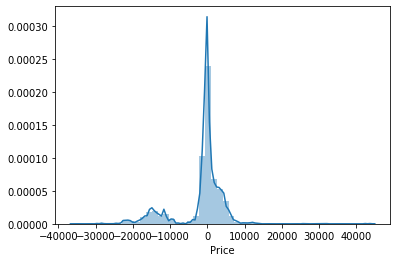

In [125]:

import seaborn as sns

sns.distplot(y_valid-y_pred)

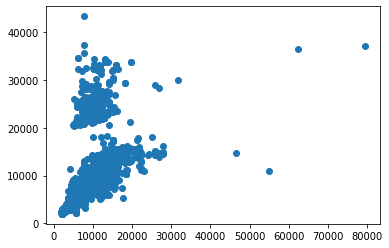

In [126]:
plt.scatter(y_valid,y_pred)
plt.show()